# Cars Forum Analysis for Entry level Sedans

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import contextlib
import warnings

import copy 
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    pass

from datetime import date, timedelta
import datetime
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


### Webscraper
---
**Writing a webscraper using selenium to scrape from https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans**


In [ ]:
# NO NEED TO KEEP RUNNING THIS CODE EVERY TIME, WE HAVE ALREADY SCRAPPED THE DATA SO READ THAT FROM THE GOOGLE DRIVE
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 8.3 MB/s 
     |████████████████████████████████| 358 kB 49.2 MB/s 
     |████████████████████████████████| 140 kB 39.0 MB/s 
     |████████████████████████████████| 58 kB 6.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [91.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:14 http:

In [ ]:
# NO NEED TO KEEP RUNNING THIS CODE EVERY TIME, WE HAVE ALREADY SCRAPPED THE DATA SO READ THAT FROM THE GOOGLE DRIVE
driver = webdriver.Chrome('chromedriver',options=chrome_options)

# NO NEED TO KEEP RUNNING THIS CODE EVERY TIME, WE HAVE ALREADY SCRAPPED THE DATA SO READ THAT FROM THE GOOGLE DRIVE
comments = pd.DataFrame(columns = ['date','user_id','comments'])
comment_ids = []

for page in range(1, 435, 1):
    driver.get(f'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p{page}')
    ids = driver.find_elements(By.XPATH, "//*[contains(@id,'Comment_')]")
    for i in ids:
        comment_ids.append(i.get_attribute('id'))
  
    for x in comment_ids:
        #Extract dates from for each user on a page
        user_date = driver.find_elements(By.XPATH, '//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
        date = user_date.get_attribute('title')

        #Extract user ids from each user on a page
        # print(driver.find_elements(By.XPATH, '//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0].text)
        userid_element = driver.find_elements(By.XPATH, '//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
        userid = userid_element.text

        driver.execute_script('''
              var element = document.getElementsByClassName("blockquote"), index;
              for (index = element.length - 1; index >= 0; index--) {
                  element[index].parentNode.removeChild(element[index]);
              }
          ''')

        #Extract Message for each user on a page
        user_message = driver.find_elements(By.XPATH, '//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
        comment = user_message.text

        #Adding date, userid and comment for each user in a dataframe    
        comments.loc[len(comments)] = [date,userid,comment]
    comment_ids = []

comments.to_csv('/content/drive/MyDrive/unstructured_analytics_assignment1/scraped_edmunds_comments.csv')

In [ ]:
comments = pd.read_csv('/content/drive/MyDrive/unstructured_analytics_assignment1/scraped_edmunds_comments.csv')

In [ ]:
#considering latest 5k comments
comments_5k=comments.head(5000) 
 
words_c=[]
for com in comments_5k['comments']:
  for element in str(com).split():
    words_c.append(element)

words = set(words_c)
counts = [(w, words_c.count(w)) for w in words]
counts_sorted=sorted(counts,key=lambda y: y[1])
counts_sorted.reverse()
counts_sorted[:10]

#code to store word frequencies
counts_sorted_word=[]
counts_sorted_count=[]
for (w,c) in counts_sorted:
  counts_sorted_word.append(w)
  counts_sorted_count.append(c)

df=pd.DataFrame(np.array([counts_sorted_word,counts_sorted_count])).T.reset_index().rename({0: 'word', 1: 'count_c'}, axis='columns')
df['index']=df['index']+1
df['count_c']=df['count_c'].astype('int')

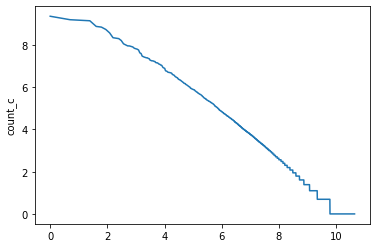

In [ ]:
#econometric proof for zipf's law
import seaborn as sns

sns.lineplot(x=np.log(df.index), y=np.log(df['count_c']) )

Zipf's law states that the frequencies of words are inversely proportional to their rank, the same can be stated econometrically based on the co-efficient/slope of the linear model, i.e. '-1', plotted for rank and frequecy for the given data

In [ ]:
# coefficient is close to -1
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
fit = lin_model.fit(np.array(np.log(df.index)).reshape(-1, 1)[1:], np.array(np.log(df['count_c']))[1:])
fit.coef_

array([-1.08133763])

In [ ]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')

#read csv of brand and model mapping
brand_model_names = pd.read_csv('/content/drive/MyDrive/unstructured_analytics_assignment1/car models and brands (3).csv')

# removing posts with less than 2 words
comments_filtered = comments[comments['comments'].str.split().str.len() > 1]

#defining a cleanup function to remove stopwords and posts whose length in less than 2 words
def cleanup(s):
 stopset = set(stopwords.words('english'))
 tokens = nltk.word_tokenize(s)
 cleanup = [token.lower() for token in tokens if token.lower() not in stopset and  len(token)>2]
 return cleanup

#creating a new column 'tokens' which contains the cleaned data
comments_filtered['tokens'] = comments_filtered['comments'].apply(cleanup)

#create a list of all the words
edmunds_corpus = []
for post in comments_filtered['tokens']:
  for word in post:
    edmunds_corpus.append(word)

#creating a dictionary containing Model and Brand name
lookup_dict = dict(zip(brand_model_names['Model'], brand_model_names['Brand']))
# adding g38 model with brand name bmw to make the list exhaustive
lookup_dict['g38'] = 'bmw'

# replace model names with brand names
edmunds_corpus = [lookup_dict.get(x, x) for x in edmunds_corpus] 
# count frequency of every word in the corpus
import collections
counter = collections.Counter(edmunds_corpus)
counter = dict(counter)
freq_dict = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))

# block to remove car, seat and problem from the data
brand_dict = dict((k, freq_dict[k]) for k in list(set(freq_dict.keys()) & (set(brand_model_names['Brand']) - set(['car', 'seat', 'problem', 'sedan']))))

top_10_brands = dict(sorted(brand_dict.items(), key=lambda item: item[1], reverse=True)[:10])
top_10_brands

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'bmw': 12123,
 'acura': 5181,
 'audi': 3610,
 'honda': 3337,
 'infiniti': 3008,
 'toyota': 1835,
 'nissan': 1376,
 'volvo': 1282,
 'cadillac': 1076,
 'ford': 1001}

In [ ]:
#get list of top 10
top_10_brands=list(dict(sorted(brand_dict.items(), key=lambda item: item[1], reverse=True)[:10]).keys())

#code to dedup token
def dedup_func(dedup_l):
    return [*set(dedup_l)]
#adding a column to dedup tokens per row
comments_filtered['tokens_dedup'] = comments_filtered['tokens'].apply(dedup_func)

#lift array/df creation
lift_array=[]
for brand1 in top_10_brands:
  for brand2 in top_10_brands:
    bb=0
    b1=0
    b2=0
    if brand1!=brand2:
      for token in comments_filtered['tokens_dedup']:
          if brand1 in token:
            b1=b1+1
          if brand2 in token:
            b2=b2+1
          if brand1 in token and brand2 in token:
            bb=bb+1
      lift_array.append([brand1,brand2,bb,b1,b2])      
      
lift_df = pd.DataFrame(columns=['brand1', 'brand2','bb','b1','b2'], data=lift_array)  

#adding columns which will help in lift calculations
N=len(comments_filtered)
lift_df['p_bb']=lift_df['bb']/N
lift_df['p_brand1']=lift_df['b1']/N
lift_df['p_brand2']=lift_df['b2']/N
lift_df['lift']=lift_df['p_bb'] / (lift_df['p_brand2'] * lift_df['p_brand1'])

lift_df

,brand1,brand2,bb,b1,b2,p_bb,p_brand1,p_brand2,lift
0,bmw,acura,787,4940,1910,0.036549,0.229415,0.088701,1.796052
1,bmw,audi,1003,4940,1932,0.046580,0.229415,0.089723,2.262931
2,bmw,honda,253,4940,759,0.011749,0.229415,0.035248,1.452969
3,bmw,infiniti,706,4940,1339,0.032787,0.229415,0.062184,2.298274
4,bmw,toyota,164,4940,428,0.007616,0.229415,0.019876,1.670235
...,...,...,...,...,...,...,...,...,...
85,ford,infiniti,33,343,1339,0.001533,0.015929,0.062184,1.547190
86,ford,toyota,45,343,428,0.002090,0.015929,0.019876,6.600535
87,ford,nissan,25,343,439,0.001161,0.015929,0.020387,3.575081
88,ford,volvo,38,343,570,0.001765,0.015929,0.026471,4.185228


In [ ]:
dfmds=lift_df[['brand1','brand2','lift']].copy()
dfmds[:20]
k=pd.DataFrame(pd.crosstab(dfmds.brand1, dfmds.brand2, values=dfmds.lift, aggfunc='mean'))

# this is the similarity matrix
k.fillna(0)


brand2,acura,audi,bmw,cadillac,ford,honda,infiniti,nissan,toyota,volvo
brand1,,,,,,,,,,
acura,0.000000,3.180245,1.796052,3.263045,1.544809,4.203546,4.310827,2.516707,2.107256,3.045910
audi,3.180245,0.000000,2.262931,4.209785,1.527218,2.217342,3.329483,1.370966,1.874935,3.754255
bmw,1.796052,2.262931,0.000000,2.289845,1.702897,1.452969,2.298274,1.558880,1.670235,1.919448
cadillac,3.263045,4.209785,2.289845,0.000000,3.270656,2.011781,3.979624,1.774606,2.693918,5.029670
ford,1.544809,1.527218,1.702897,3.270656,0.000000,3.804753,1.547190,3.575081,6.600535,4.185228
honda,4.203546,2.217342,1.452969,2.011781,3.804753,0.000000,1.970449,6.720964,10.075407,2.637933
infiniti,4.310827,3.329483,2.298274,3.979624,1.547190,1.970449,0.000000,4.981938,2.329549,3.018790
nissan,2.516707,1.370966,1.558880,1.774606,3.575081,6.720964,4.981938,0.000000,10.314276,2.839743
toyota,2.107256,1.874935,1.670235,2.693918,6.600535,10.075407,2.329549,10.314276,0.000000,3.000992


In [ ]:
# creating a dissimilarity matrix based on similarity matrix
kinv = k.apply(lambda x:1/x).fillna(0)
kinv

brand2,acura,audi,bmw,cadillac,ford,honda,infiniti,nissan,toyota,volvo
brand1,,,,,,,,,,
acura,0.000000,0.314441,0.556777,0.306462,0.647329,0.237894,0.231974,0.397345,0.474551,0.328309
audi,0.314441,0.000000,0.441905,0.237542,0.654785,0.450991,0.300347,0.729413,0.533352,0.266364
bmw,0.556777,0.441905,0.000000,0.436711,0.587235,0.688246,0.435109,0.641486,0.598718,0.520983
cadillac,0.306462,0.237542,0.436711,0.000000,0.305749,0.497072,0.251280,0.563505,0.371206,0.198820
ford,0.647329,0.654785,0.587235,0.305749,0.000000,0.262829,0.646333,0.279714,0.151503,0.238936
honda,0.237894,0.450991,0.688246,0.497072,0.262829,0.000000,0.507499,0.148788,0.099252,0.379085
infiniti,0.231974,0.300347,0.435109,0.251280,0.646333,0.507499,0.000000,0.200725,0.429268,0.331259
nissan,0.397345,0.729413,0.641486,0.563505,0.279714,0.148788,0.200725,0.000000,0.096953,0.352144
toyota,0.474551,0.533352,0.598718,0.371206,0.151503,0.099252,0.429268,0.096953,0.000000,0.333223


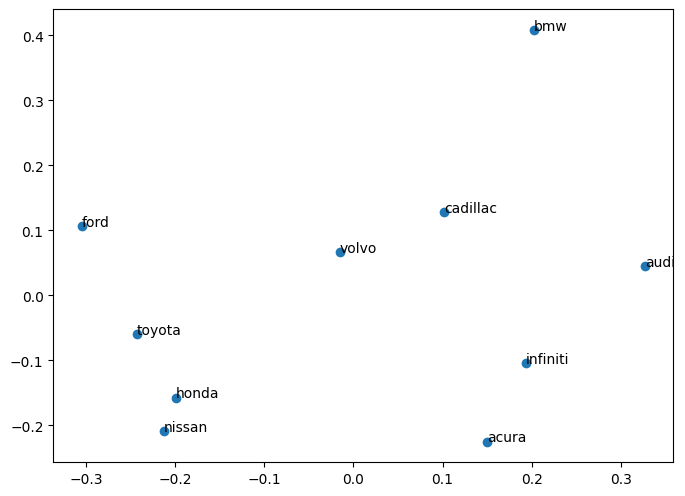

In [ ]:
from sklearn import manifold
from matplotlib.pyplot import figure

#code for MDS plot
cars = ['acura','audi','bmw','cadillac','ford','honda','infiniti','nissan','toyota','volvo']
mds = manifold.MDS(2, dissimilarity='precomputed', random_state=7)
coords = mds.fit_transform(kinv.values)
x, y = coords[:, 0], coords[:, 1]

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
ax.scatter(x, y)
for (car, _x, _y) in zip(cars, x, y):
    ax.annotate(car, (_x, _y))
plt.show()


1. We see that the lift ratios are high for (nissan, toyota), (honda, toyota) and (acura, infiniti). This is evidence that people have similar perception about these brands. These companies can target the users of the other two brands as they would be more likely to switch, if offered slightly better price point or features. Being japanese brands, it makes sense that customers think of these three brands in close association.
2. We see that the infiniti, acura and audi also have high lift values among each possible pair. This gives us another market segment which these brands can target when advertising for their entry level luxury car models. 

In [ ]:
freq_df = pd.DataFrame(freq_dict.items(), columns=["word", "count"])

#Considering top 5 features with highest frequency from the 'freq_df' above
top_5_features=['engine', 'price', 'performance', 'awd', 'luxury']

#lift array/df creation
lift_array_beand_feat=[]
for brand1 in top_10_brands:
  for feature in top_5_features:
    bf=0
    cb=0
    cf=0
    for token in comments_filtered['tokens_dedup']:
        if brand1 in token:
          cb=cb+1
        if feature in token:
          cf=cf+1
        if brand1 in token and feature in token:
          bf=bf+1
    lift_array_beand_feat.append([brand1,feature,bf,cb,cf])      
      
lift_array_beand_feat_df = pd.DataFrame(columns=['brand', 'feature','bf','cb','cf'], data=lift_array_beand_feat)  

#adding columns which will help in lift calculations
N=len(comments_filtered)
lift_array_beand_feat_df['p_bf']=lift_array_beand_feat_df['bf']/N
lift_array_beand_feat_df['p_brand']=lift_array_beand_feat_df['cb']/N
lift_array_beand_feat_df['p_feature']=lift_array_beand_feat_df['cf']/N
lift_array_beand_feat_df['lift']=lift_array_beand_feat_df['p_bf'] / (lift_array_beand_feat_df['p_brand'] * lift_array_beand_feat_df['p_feature'])

lift_array_beand_feat_df

,brand,feature,bf,cb,cf,p_bf,p_brand,p_feature,lift
0,bmw,engine,660,4940,1667,0.030651,0.229415,0.077416,1.725782
1,bmw,price,885,4940,2195,0.041100,0.229415,0.101937,1.757464
2,bmw,performance,790,4940,2089,0.036688,0.229415,0.097014,1.648414
3,bmw,awd,329,4940,1166,0.015279,0.229415,0.054149,1.229915
4,bmw,luxury,598,4940,1661,0.027771,0.229415,0.077137,1.569311
5,acura,engine,255,1910,1667,0.011842,0.088701,0.077416,1.724550
6,acura,price,352,1910,2195,0.016347,0.088701,0.101937,1.807920
7,acura,performance,339,1910,2089,0.015743,0.088701,0.097014,1.829500
8,acura,awd,250,1910,1166,0.011610,0.088701,0.054149,2.417200
9,acura,luxury,331,1910,1661,0.015372,0.088701,0.077137,2.246620


In [ ]:
#Calculating lift between top 10 brands and top 5 features 

mdsfeature=lift_array_beand_feat_df[['brand','feature','lift']].copy()
mdsfeature[:20]
k2=pd.DataFrame(pd.crosstab(mdsfeature.brand, mdsfeature.feature, values=mdsfeature.lift, aggfunc='mean'))
k2=k2.fillna(0)
k2

feature,awd,engine,luxury,performance,price
brand,,,,,
acura,2.417200,1.724550,2.246620,1.829500,1.807920
audi,2.619084,1.758400,1.865403,1.814003,1.954896
bmw,1.229915,1.725782,1.569311,1.648414,1.757464
cadillac,1.443184,1.271159,2.832917,1.849736,1.944968
ford,0.969135,1.807657,2.267734,1.712958,1.801841
honda,1.654524,1.940135,2.152106,1.534627,1.512217
infiniti,2.234295,1.688210,2.188078,1.847552,1.963470
nissan,1.598546,2.530480,1.712767,1.620133,1.340778
toyota,1.078704,1.418479,2.514023,1.252350,1.489840




1. From the lift calculations in the table above we see that cadillac is most associated to luxury. However, it is peculiar to note that volvo has the most mentions associated to luxury. This maybe because volvo customers are most likely to aspire and hence switch to luxury brands.
2. We see that ford is least mentioned when AWD is discussed, this gives the company a possible area to improve upon so as to draw in more customers who are looking for AWD.
3. We see that Infiniti is mentioned the most when people talk about the price of a car, which is expected due to the Infiniti's value-for-money cars.
4. When it comes to engine, nissan is the most talked about brand. They can leverage this feature to differentiate itself from its competitors. 

In [ ]:
#To identify most aspirational brand

comments_filtered['bigram_tokens'] = comments_filtered['comments'].str.split().apply(lambda t: [lookup_dict.get(x, x) for x in t])
comments_filtered['bigrams'] = comments_filtered['bigram_tokens'].apply(lambda x: [*map(' '.join, nltk.bigrams(x))])
aspirational_words_mapping = {'would love' : 'aspirational',
'love to' :  'aspirational',
'dream of' :  'aspirational',
'hope to' :  'aspirational',
'aim to' :  'aspirational',
'dream to': 'aspirational',
'desire to' :  'aspirational',
'aspire to' : 'aspirational'}

# replacing aspirational bigrams with aspirational as all these terms above are indicative of being aspirational, with no relative difference between any two when measured to be more aspirational or less
comments_filtered['bigrams'] = comments_filtered['bigrams'].apply(lambda x: [aspirational_words_mapping.get(t, t) for t in x])

top_5_features=['aspirational']

#lift array/df creation
lift_array_beand_feat=[]
comments_filtered['is_asp']=comments_filtered['bigrams'].apply(lambda x: bool('aspirational' in  x))
for brand1 in top_10_brands:
  comments_filtered['temp_brand']=comments_filtered['tokens_dedup'].apply(lambda x: bool(brand1 in  x))
  brandrows=len(comments_filtered[comments_filtered['temp_brand']==True])
  asprows=len(comments_filtered[comments_filtered['is_asp']==True])
  bothrows=len(comments_filtered[(comments_filtered['is_asp']==True) & (comments_filtered['temp_brand']==True)])
  lift_array_beand_feat.append([brand1,'aspirational',brandrows,asprows,bothrows])      
      
lift_array_beand_feat_df = pd.DataFrame(columns=['brand', 'aspirational','brandrows','asprows','bothrows'], data=lift_array_beand_feat)  

N=len(comments_filtered)
lift_array_beand_feat_df['p_bothrows']=lift_array_beand_feat_df['bothrows']/N
lift_array_beand_feat_df['p_brand']=lift_array_beand_feat_df['brandrows']/N
lift_array_beand_feat_df['p_asprows']=lift_array_beand_feat_df['asprows']/N
lift_array_beand_feat_df['lift']=lift_array_beand_feat_df['p_bothrows'] / (lift_array_beand_feat_df['p_brand'] * lift_array_beand_feat_df['p_asprows'])

lift_array_beand_feat_df

,brand,aspirational,brandrows,asprows,bothrows,p_bothrows,p_brand,p_asprows,lift
0,bmw,aspirational,4940,244,102,0.004737,0.229415,0.011331,1.822166
1,acura,aspirational,1910,244,34,0.001579,0.088701,0.011331,1.570942
2,audi,aspirational,1932,244,50,0.002322,0.089723,0.011331,2.283903
3,honda,aspirational,759,244,14,0.000650,0.035248,0.011331,1.627800
4,infiniti,aspirational,1339,244,24,0.001115,0.062184,0.011331,1.581777
5,toyota,aspirational,428,244,6,0.000279,0.019876,0.011331,1.237150
6,nissan,aspirational,439,244,3,0.000139,0.020387,0.011331,0.603075
7,volvo,aspirational,570,244,11,0.000511,0.026471,0.011331,1.703070
8,cadillac,aspirational,691,244,10,0.000464,0.032090,0.011331,1.277135
9,ford,aspirational,343,244,2,0.000093,0.015929,0.011331,0.514577


Audi is the most aspired brand in this dataset. From this we can infer that Audi has positioned itself well with car enthusiasts and customers in general. Audi also ranks well when it comes to the most important features to customers like AWD, Price and Luxury. This implies that Audi can pull in a lot of customers from other brands positioning themselves as better in these categories. Our insight based on this competitive analysis for aspirational brands to JD Power and Associates is that Audi is better positioned to be a great entry-level luxury car option.